In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

In [3]:
df=pd.read_csv(r'C:\Users\gabri\Desktop\Residêcia\SiDi\Projeto Licitação\Data\dados_taguiados.csv')

In [4]:
df.head(1)

,Unnamed: 0,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,Município,data,Data Abertura,Total,Tipo,Tag
0,0,12018,120630,BASE AEREA DE DE MANAUS,3,Concorrência,67290015424201435,Objeto: Contratação de empresa de engenharia e...,Evento de Resultado de Julgame,52000,Ministério da Defesa,52111,Comando da Aeronáutica,MANAUS,19/07/2018,NaN,1063307.91,Obras,0


In [5]:
len(df)

500206

## Análise Financeira Temporal das Licitações Fraudulentas

In [6]:
df_1 = df[df['Tag']==0][['data','Total']]

In [7]:
df_1["data"] = pd.to_datetime(df_1['data'])

In [8]:
df_1.set_index('data', inplace = True)

In [9]:
df_1 = df_1.groupby(by=['data']).sum().groupby(level=[0]).cumsum()

In [10]:
df_1.dtypes

Total    float64
dtype: object

In [11]:
df_1.sort_values(['data'], inplace = True)

In [12]:
len(df_1)

910

### Sem diferenciar a série

<AxesSubplot:xlabel='data'>

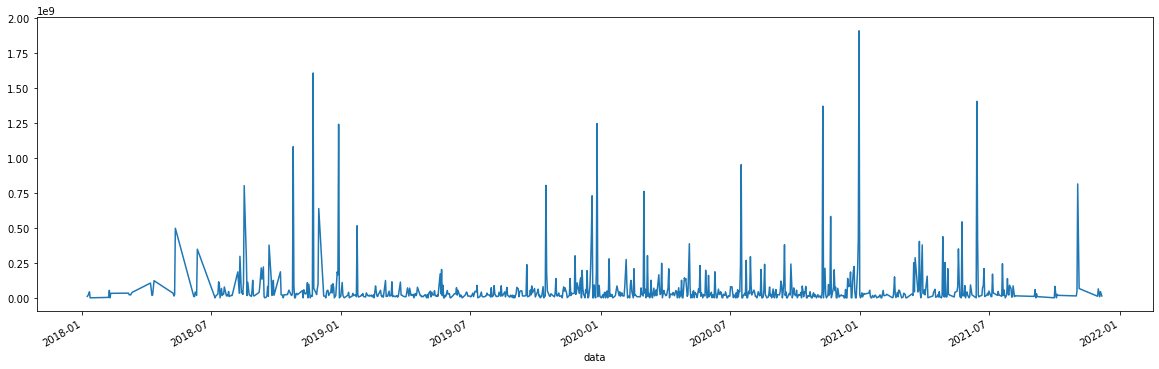

In [14]:
df_1["Total"].plot(figsize=(20,6))

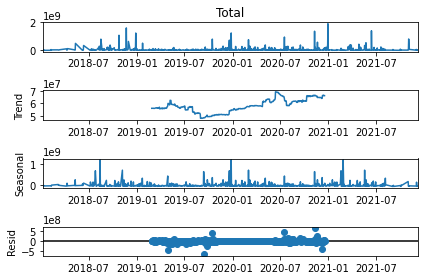

In [17]:
df_decomp = tsa.seasonal_decompose(df_1["Total"], period = 365 )
df_decomp.plot();

#### Diferenciando a série

In [12]:
df_1_d = df_1.diff().dropna()

#### Plotando a série

<AxesSubplot:xlabel='data'>

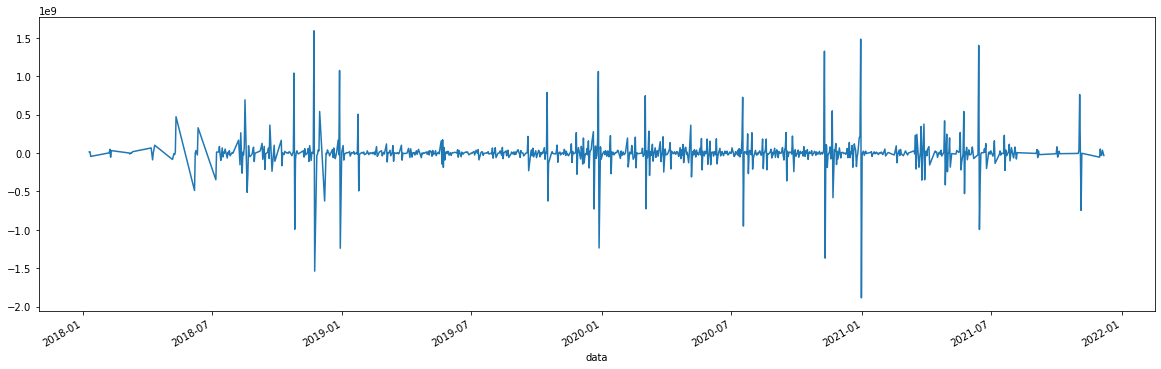

In [13]:
df_1_d["Total"].plot(figsize=(20,6))

#### Decomposição da série

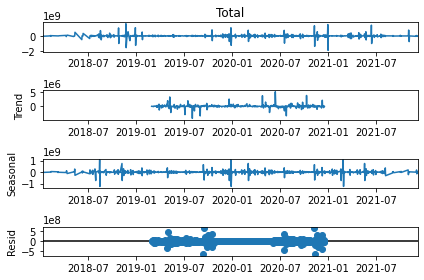

In [19]:
df_decomp = tsa.seasonal_decompose(df_1_d["Total"], period = 365 )
df_decomp.plot();

#### Média movel mensal

<AxesSubplot:xlabel='data'>

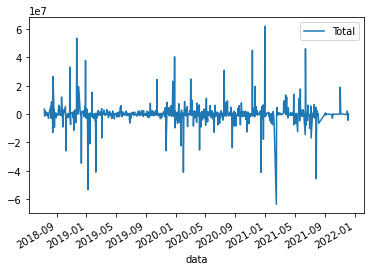

In [20]:
df_1_d.rolling(30).mean().plot()

# Analise numérica

In [22]:
df.head(1)

,Unnamed: 0,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,Município,data,Data Abertura,Total,Tipo,Tag
0,0,12018,120630,BASE AEREA DE DE MANAUS,3,Concorrência,67290015424201435,Objeto: Contratação de empresa de engenharia e...,Evento de Resultado de Julgame,52000,Ministério da Defesa,52111,Comando da Aeronáutica,MANAUS,19/07/2018,NaN,1063307.91,Obras,0


In [33]:
df_3 = pd.DataFrame(df[df['Tag'] == 0]["data"])

In [34]:
df_3["data"] = pd.to_datetime(df_3['data'])

In [35]:
df_3 = pd.DataFrame(df_3.value_counts()).sort_values(['data'])

In [36]:
df_3 = df_3.rename(columns={"0":"Numero_Lic"})

In [37]:
df_3.head(1)

,0
data,
2018-01-08,107


#### Plotando a série

<AxesSubplot:xlabel='data'>

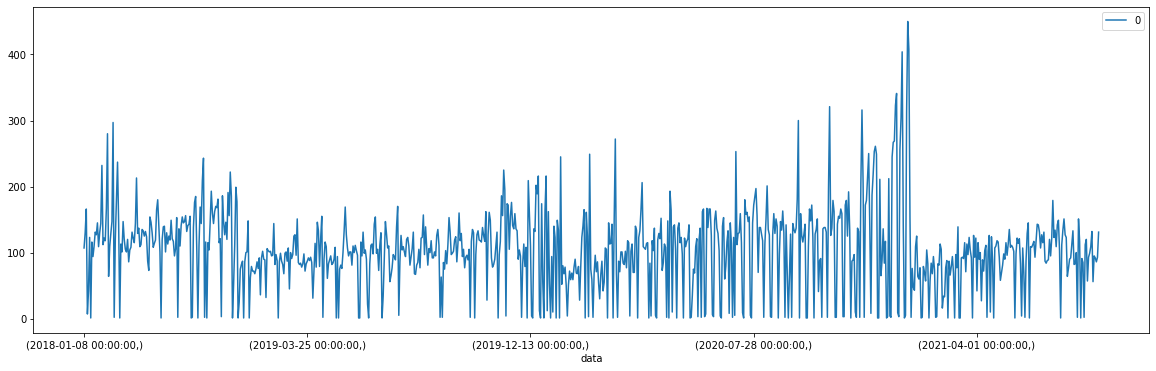

In [38]:
df_3.plot(figsize=(20,6))

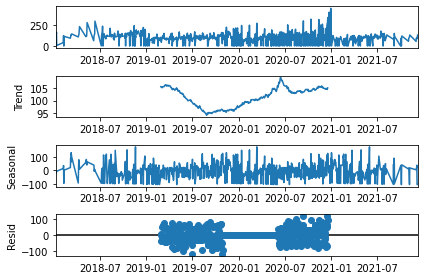

In [39]:
df_decomp = tsa.seasonal_decompose(df_3, period = 365 )
df_decomp.plot();

#### Diferenciando a série 

In [40]:
df_3_d = df_3.diff().dropna()

<AxesSubplot:xlabel='data'>

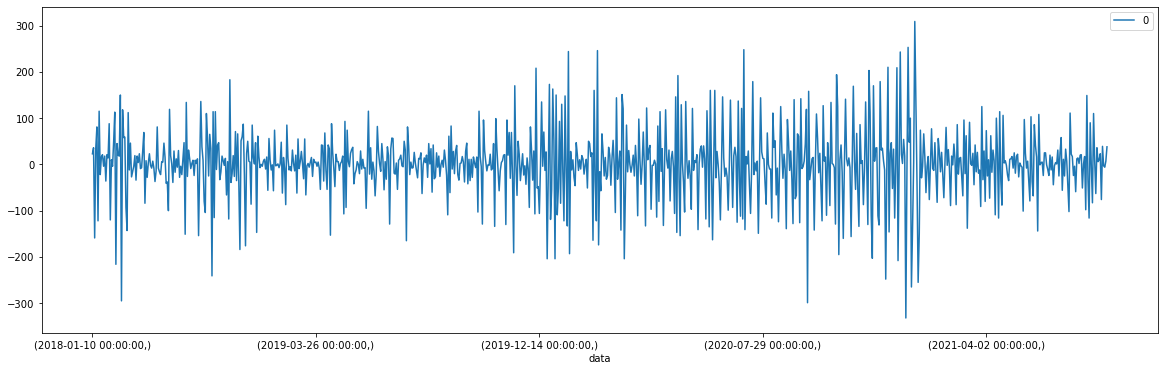

In [41]:
df_3_d.plot(figsize=(20,6))

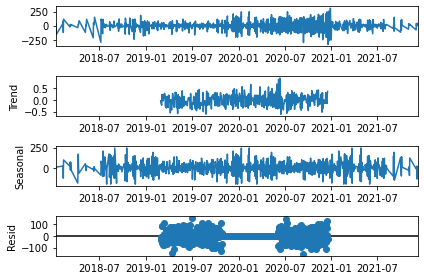

In [42]:
df_decomp = tsa.seasonal_decompose(df_3_d, period = 365 )
df_decomp.plot();